In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import pandas as pd

In [4]:
from pandas.core.reshape.api import concat
# create engine to hawaii.sqlite
from sqlalchemy import create_engine, MetaData, Table, Column, ForeignKey
from sqlalchemy.ext.automap import automap_base
database_path="/content/hawaii.sqlite"
engine = create_engine(f"sqlite:///{database_path}")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

<ipython-input-5-7ca67169d95a>:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine,reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
#By trial and error, I was able to identify that the most recent date is 08-23-2017:
results1=session.query(func.max(measurement.date)).one()
results1

('2017-08-23',)

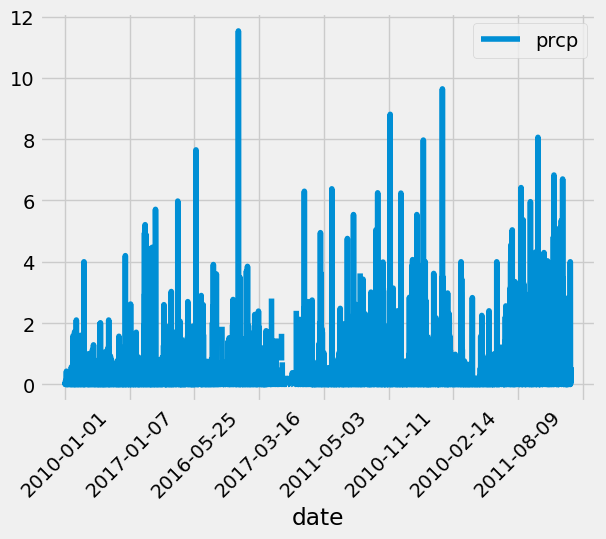

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
last_twelve_months=dt.date(2017,8,23)-dt.date(2016,8,23)

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
results2=session.query(measurement.date,measurement.prcp).filter(measurement.date>=last_twelve_months).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
dataframe1=pd.DataFrame(results2)
dataframe1["date"]=dataframe1["date"].rename("Date")
dataframe1["prcp"]=dataframe1["prcp"].rename("Precipitation")
# Sort the dataframe by date
df1=dataframe1.sort_values(by="date",ascending=True)
dataframe1.set_index(dataframe1["date"],inplace=True)
# Use Pandas Plotting with Matplotlib to plot the data
dataframe1.drop(columns="date",axis=1)
graph=dataframe1.plot()
plt.xticks(rotation=45)
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
dataframe1.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
results3=session.query(func.count(station.name)).all()
results3

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
results4=session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
results4

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
results5=session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station=="USC00519281").all()
results5

[(54.0, 85.0, 71.66378066378067)]

<Axes: ylabel='Frequency'>

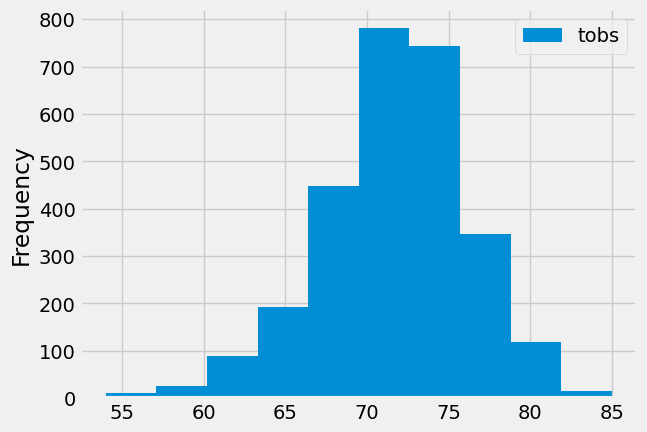

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_twelve_months
import seaborn as sns
result6=session.query(measurement.tobs).filter(measurement.station=="USC00519281").filter(measurement.date>=last_twelve_months).all()
dataframefinal=pd.DataFrame(result6,columns=["tobs"])
dataframefinal.plot.hist()

In [29]:
def precipitation():
  return(dataframe1.to_dict())
precipitation()

{'date': {'2010-01-01': '2010-01-01',
  '2010-01-02': '2010-01-02',
  '2010-01-03': '2010-01-03',
  '2010-01-04': '2010-01-04',
  '2010-01-06': '2010-01-06',
  '2010-01-07': '2010-01-07',
  '2010-01-08': '2010-01-08',
  '2010-01-09': '2010-01-09',
  '2010-01-10': '2010-01-10',
  '2010-01-11': '2010-01-11',
  '2010-01-12': '2010-01-12',
  '2010-01-14': '2010-01-14',
  '2010-01-15': '2010-01-15',
  '2010-01-16': '2010-01-16',
  '2010-01-17': '2010-01-17',
  '2010-01-18': '2010-01-18',
  '2010-01-19': '2010-01-19',
  '2010-01-20': '2010-01-20',
  '2010-01-21': '2010-01-21',
  '2010-01-22': '2010-01-22',
  '2010-01-23': '2010-01-23',
  '2010-01-24': '2010-01-24',
  '2010-01-25': '2010-01-25',
  '2010-01-26': '2010-01-26',
  '2010-01-27': '2010-01-27',
  '2010-01-28': '2010-01-28',
  '2010-01-30': '2010-01-30',
  '2010-01-31': '2010-01-31',
  '2010-02-01': '2010-02-01',
  '2010-02-03': '2010-02-03',
  '2010-02-04': '2010-02-04',
  '2010-02-05': '2010-02-05',
  '2010-02-06': '2010-02-06',
  

# Close Session

In [35]:
# Close Session
session.close()

In [60]:
from flask import Flask

In [61]:
app=Flask(__name__)

In [62]:
@app.route("/")
def home():
  print("The routes available are:" ["precipitation","stations","tabs","start","startend"])

<>:3: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:3: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
<ipython-input-62-8bf7e169c1c2>:3: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
  print("The routes available are:" ["precipitation","stations","tabs","start","startend"])


In [63]:
@app.route("/precipitation")
def precipitation():
  dataframe2=dataframe1.to_dict()
  return dataframe2.jsonify()

In [64]:
@app.route("/stations")
def stations():
  return session.query(station.name).all().jsonify()

In [65]:
@app.route("/tabs")
def tabs():
  return session.query(measurement.tobs).filter(measurement.station=="USC00519281").filter(measurement.date>=last_twelve_months).all().jsonify()


In [66]:
start_date=""
@app.route("/start")
def start():
  return session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station=="USC00519281").group_by(measurement.date>=start_date).all().jsonifY()


In [58]:
start_date=""
end_date=""
@app.route("/start-end")
def startend():
  return session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station=="USC00519281").group_by(measurement.date>=start_date).group_by(measurement.date<=end_date).all().jsonify()